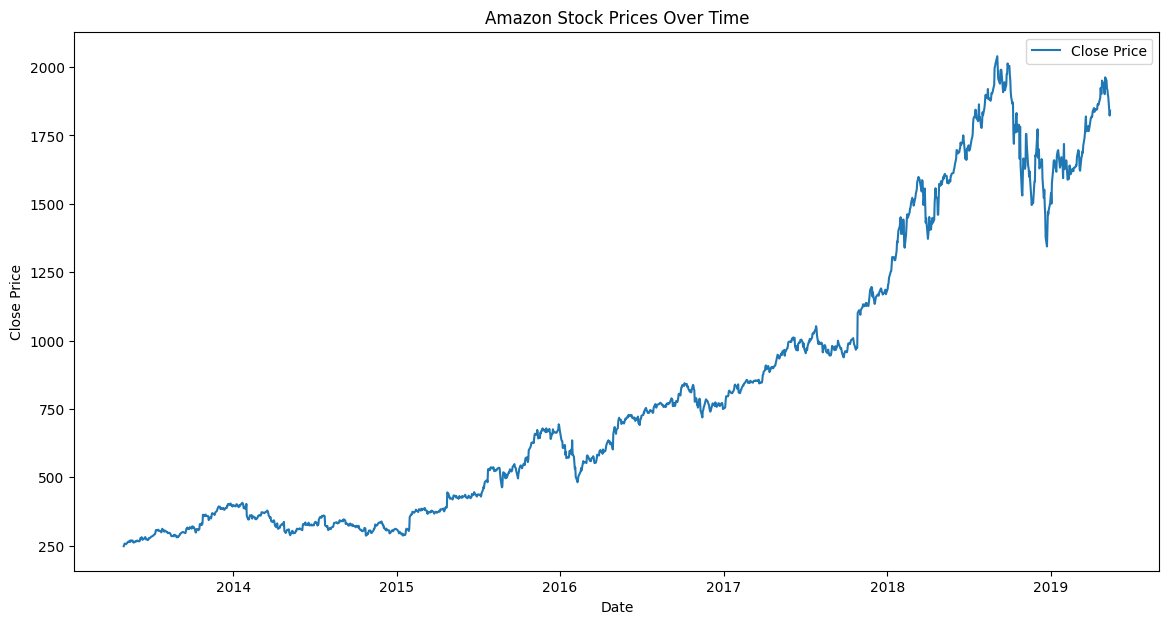

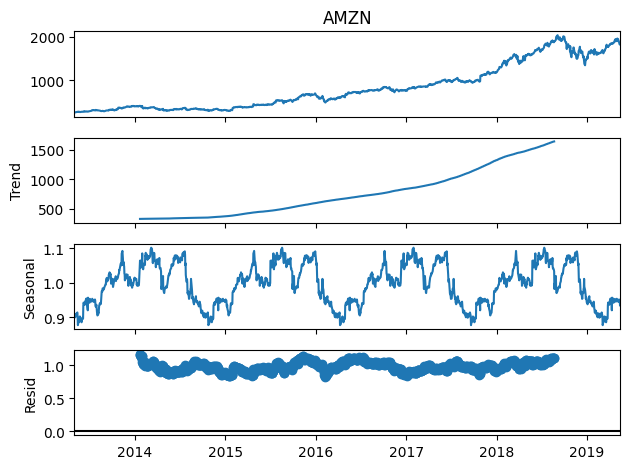

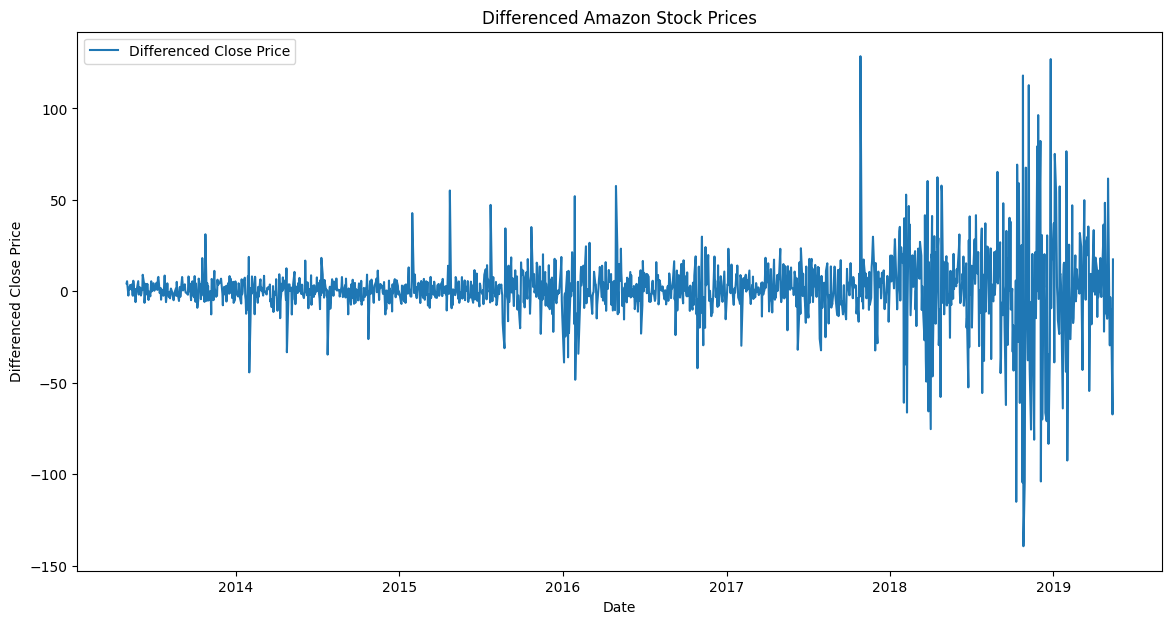

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

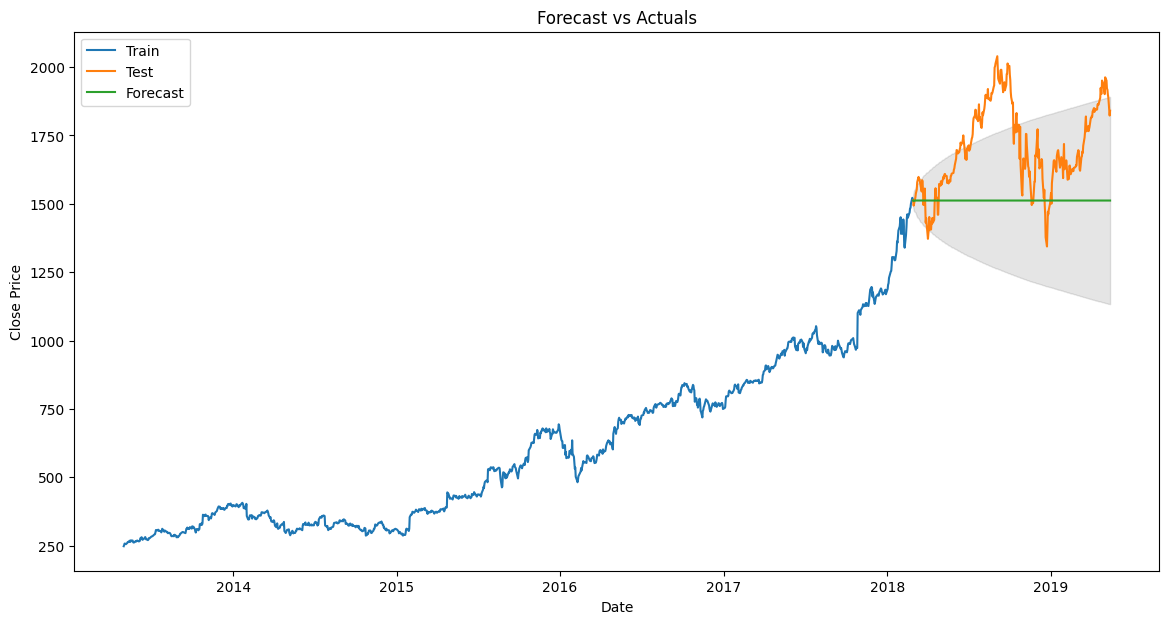

(count    1520.000000
 mean      821.541810
 std       518.442653
 min       248.229996
 25%       364.360001
 50%       686.459992
 75%      1121.287536
 max      2039.510010
 Name: AMZN, dtype: float64,
 0.55365991233002,
 0.9864159495725892,
 {'1%': -3.434731647915545,
  '5%': -2.8634752174058944,
  '10%': -2.5678002869095424},
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                   AMZN   No. Observations:                 1216
 Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4633.295
 Date:                Fri, 26 Jul 2024   AIC                           9278.590
 Time:                        13:37:51   BIC                           9309.205
 Sample:                             0   HQIC                          9290.115
                                - 1216                                         
 Covariance Type:                  opg                   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
file_path = '/content/portfolio_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.sort_index()
close_column = 'AMZN'
summary_stats = data[close_column].describe()

# Plotting the stock prices
plt.figure(figsize=(14, 7))
plt.plot(data[close_column], label='Close Price')
plt.title('Amazon Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Decompose the time series to see the trend, seasonality, and residuals
decomposition = seasonal_decompose(data[close_column], model='multiplicative', period=365)
fig = decomposition.plot()
plt.show()

# Conduct the Augmented Dickey-Fuller test to check stationarity
result = adfuller(data[close_column])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Differencing to make the time series stationary
data['Close_diff'] = data[close_column] - data[close_column].shift(1)
data['Close_diff'] = data['Close_diff'].dropna()

# Plotting the differenced series
plt.figure(figsize=(14, 7))
plt.plot(data['Close_diff'], label='Differenced Close Price')
plt.title('Differenced Amazon Stock Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[close_column][:train_size], data[close_column][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
model_summary = model_fit.summary()

# Forecasting using get_forecast
forecast_result = model_fit.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Align forecast index with test data index
forecast.index = test.index

# Plotting the forecast against actual values
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.fill_between(forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.1)
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate the mean squared error
mse = mean_squared_error(test, forecast)

summary_stats, adf_statistic, p_value, critical_values, model_summary, mse
